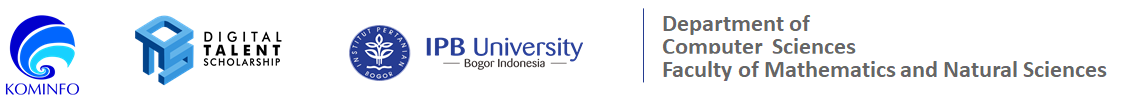

# ***Kelompok 2*** #

## Mendeteksi Sebuah Gerakan Menggunakan OpenCV

### **Deskripsi Project**

Project ini bertujuan untuk **mendeteksi sebuah gerakan** yang terjadi, jika terdeteksi akan ada pemberitahuan bahwa terdapat sebuah objek yang sedang bergerak. Program ini mengakses kamera pengguna dan disimpan dalam bentuk video.    

#### A. Import Package yang Dibutuhkan
Untuk keperluan project ini menggunakan 3 package:
- **OpenCV**   : atau *Open Source Computer Vision Library* sering digunakan untuk mengolah gambar ataupun video.
- **Numpy**    : Berfungsi untuk proses komputasi numerik disini digunakan untuk melihat dimensi atau ukuran dari suatu frame
- **winsound** : Merupakan library yang digunakan untuk mengeluarkan suara. Package ini digunakan untuk mengeluarkan suara berupa beep ketika terdeteksi ada gerakan 

In [1]:
import cv2 
import numpy as np 
import winsound
from IPython.display import Video

##### B. Menyalakan Kamera dan Membuat Frame
- Mengakses kamera untuk merekam menggunakan **VideoCapture** dan diberi nama **cap** untuk memudahkan pemanggilan
- Pada baris ke 2 dan 3 membuat variabel **frame_width** atau lebar dari sebuah frame dan **frame_height** atau tinggi dari sebuah frame

In [2]:
#cap = cv2.VideoCapture('sip.mp4')
cap = cv2.VideoCapture(0)

frame_width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#### C. Membuat File Tempat Menyimpan Video
Pada bagian ini bertujuan untuk membuat tempat atau file untuk menyimpan video yang telah dijalankan
- Baris ke 1  **Fourcc** (four character code) adalah metode untuk menandai video codec, compression format, serta format warna dan pixel pada video file
- Baris ke 2 membuat sebuah video dengan nama **output.avi** menggunakan **VideoWriter**, angka 5 menunjukan *frame per second* dan (1366x768) menunjukan ukuran dari frame
- Baris ke 3 dan 4 membuat 2 variabel untuk menyimpan potongan-potongan dari sebuah frame yang akan disatukan menjadi suatu video

In [3]:
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')

out = cv2.VideoWriter("output.avi", fourcc, 5, (1366,768))

ret, frame1 = cap.read()
ret, frame2 = cap.read()
print(frame1.shape)
print(frame2.shape)

(480, 640, 3)
(480, 640, 3)


#### D. Merekam Video Beserta Mendeteksi Pergerakan
Pada bagian ini merupakan program  untuk mendeteksi perbedaan 
- Baris 2 sampai 5 untuk mendeteksi perbedaan antara 2 frame menggunakan **absdiff** lalu pada perbedaan itu dibuat warnanya ke abu-abuan dengan **cvtColor** lalu dibuat sebuah perseegi (5x5) dan diperhalus gambarnya menggunakan **GaussianBlur**
- Baris 7 sampai 13. method dilate digunakan untuk memperlebar pixel objek yang telah terdeteksi bergerak yang kemudian akan dibingkai menggunakan method rectangle. sedangkan method findContours digunakan untuk mendapatkan kontur atau struktur gambar binary sebelumnya yang sudah didilate, disimpan dalam bentuk list yang akan mengalami looping untuk menandai titik perbedaan antar frame. 
- Baris 15 sampai 17 untuk menampilkan peringatan dengan memberi tanda objek yang bergerak dengan persegi berwarna hijau. kemudian ditampilkan tulisan **ADA OBJEK BERGERAK** dengan font dan warna yang ditentukan. peringatan ditambah dengan suara menggunakan modul winsound dengan frekuensi 2200 hz dan interval 15 milisecond.
- Baris 19 sampai 26 merubah ukuran dimensi dari frame1 menggunakan **resize** lalu menggabungkannya ke dalam video menggunakan **write**. Selanjutnya menampilkan frame1 menggunakan **imshow**. **ret, frame2 = cap.reed()** berarti menjalankannya terus menerus untuk **waitKey** mempunyai fungsi ketika keyboard ditekan beberapa milisecond maka video akan dihentikan atau **break**.




In [4]:
while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5) , 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
#baris 7 sampai 13 
    dilated = cv2.dilate(thresh, None, iterations = 3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
    
        if cv2.contourArea(contour) < 900:
            continue
#baris 15 sampai 17      
        cv2.rectangle(frame1, (x,y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(frame1, "Perhatian: {}".format('Ada Objek Bergerak !'), (10,20), cv2.FONT_HERSHEY_SIMPLEX,1,(34,12,46), 3)
        winsound.Beep(2200,15)
#Baris 19 sampai 26
    image = cv2.resize(frame1, (1366,768))
    out.write(image)
    cv2.imshow("feed", frame1)
    frame1 = frame2
    ret, frame2 = cap.read()

    if cv2.waitKey(40) == 27:
        break

#### E. Menghentikan Video
Pada bagian ini ketika kamera akan dimatikan maka video akan disimpan dalam bentuk file video menggunakan **release** dan menutup semua frame yang digunakan menggunakan **destroyAllWindow**

In [5]:
cap.release()
out.release()
cv2.destroyAllWindows()

In [9]:
Video("sip.mp4")

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')